# Example notebook using the Joint Return Probability (JRP) module

In [31]:
from app import jrp
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# file output from Eleonora's detectExtremeEvents software
file = "DATA/jextr_api9824h98pot5_daily_7dw.xlsx"
        
# loads the data from the file to create a new JRP object
jrp =  jrp.JRP.from_detectExtremeEvents(file)      
    
# reformats the data for Stan, prints a summary
jrp.format_data_for_stan(
    # these are the user defined values for a JRP2 plot with fixed marginal return periods (see below)
    # note we only specify two here, but you can add as many as you like (4 would reproduce the red limnes
    # in the old JRP plot)
    u_rp_d1_years=np.array([2,10]),
    u_rp_d2_years=np.array([2,10]),
    # these are the user defined values for a JRP2 plot with fixed driver values (see below)
    u_val_d1 = np.array([300,400]),
    u_val_d2 = np.array([60,100])
    )


-------------------------------------------------------------------------
DATA SUMMARY
-------------------------------------------------------------------------
Driver 1: API , threshold 98.0 % , 270.4298 mm
Driver 2: r24h , threshold 98.0 % , 42.4332 mm
34 extreme events selected using:
 (1) A search window of 7 days 
 (2) minimum peaks distance of 5 unit coherent with temporal resolution for driver 1
 (3) minimum peaks distance of 5 unit coherent with temporal resolution for driver 2.
Giving a correlation coefficient of  0.17291
-------------------------------------------------------------------------
STAN CONFIGURATION
-------------------------------------------------------------------------
Stan will be run with 4 chains for 2000 samples each.
All other settings set to defaults
-------------------------------------------------------------------------
JRP CONTOUR PLOT CONFIGURATION
-------------------------------------------------------------------------
JRP grid for the contour plo

()

In [33]:
# compiles the Stan model (generates lots of warnings, ignore them)
jrp.build_stan_model()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_a7j30s6r/model_gw475pkl.stan', line 151, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_a7j30s6r/model_gw475pkl.stan', line 152, column 14: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_a7j30s6r/model_gw475pkl.stan', line 318, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

Building Stan model ...


In [34]:
# sample from the posterior
jrp.run_stan_model()

Sampling:   0%


Running Stan model ...


Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000337 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.37 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: Exception: Exception: sigma<=0; found sigma =0 (in '/tmp/httpstan_9f7b_xnd/model_gw475pkl.stan', line 19, column 10 to column 51) (in '/tmp/httpstan_9f7b_xnd/model_gw475pkl.stan', line 257, column 8 to column 49) (in '/tmp/httpstan_9f7b_xnd/model_gw475pkl.stan', line 348, column 8 to line 351, column 34)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.000348 seconds
  1000 transitions using 10 leapfrog steps per transitio

In [35]:
# print summary
# !!!!!!  IMPORTANT !!!!!!!!!!
# rhat should all be <1.1, preferably 1.0
# ess_bulk and ess_tall should all be on the order of thousands
jrp.get_summary()

/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/diagnostics.py:965: RuntimeWarning: invalid value encountered in subtract
  ary_folded = np.abs(ary - np.median(ary))
arviz - WARNING - Array contains NaN-value.
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/stats/stats_utils.py:38: RuntimeWarning: invalid value encountered in subtract
  ary =

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma1,65.095,17.536,34.224,97.214,0.260,0.185,4524.0,4273.0,1.0
xi1,0.060,0.257,-0.362,0.550,0.004,0.003,4123.0,4129.0,1.0
sigma2,64.296,14.785,38.675,92.369,0.218,0.156,4693.0,4614.0,1.0
xi2,-0.484,0.217,-0.868,-0.048,0.003,0.002,4137.0,4623.0,1.0
theta,1.305,0.198,1.000,1.648,0.003,0.002,3926.0,2824.0,1.0
...,...,...,...,...,...,...,...,...,...
u_d1_for_rp[1],426.750,48.020,364.763,497.245,0.580,0.417,8252.0,6416.0,1.0
u_d2_for_rp[0],76.333,5.969,65.900,87.882,0.084,0.060,5108.0,4641.0,1.0
u_d2_for_rp[1],129.233,11.566,110.532,149.133,0.140,0.100,7448.0,6329.0,1.0
u_JRP[0],1155.041,89.193,999.213,1324.123,1.395,1.004,3926.0,2824.0,1.0


In [36]:
# return periods and joint return periods for the events selected with detectExtremeEvents
jrp.generate_table()

data                     Joint Return Period (JRP, years)             \
         Time      API mm r24h mm                             mean     median   
0  1981-09-26  351.897978  106.43                        10.459812   9.357442   
1  1981-11-03  272.218593   42.81                         1.119268   1.117889   
2  1982-10-27  303.791680  114.29                         8.108418   7.454145   
3  1983-10-04  273.183131   91.91                         3.073568   2.973278   
4  1984-09-21  284.665805   92.16                         3.471093   3.356884   
5  1986-12-13  288.673519   59.26                         1.854938   1.830952   
6  1987-09-22  304.542927   78.72                         3.235675   3.139971   
7  1987-10-22  273.943031   67.71                         1.782096   1.759844   
8  1988-01-14  307.601568   65.50                         2.670958   2.602244   
9  1990-02-01  274.843814   49.70                         1.300857   1.296300   
10 1991-03-16  341.834447  135.70                        32.314396  24.246386   
11 1991-11-03  285.707021   68.74                         2.105605   2.074655   
12 1991-11-12  295.457378   52.09                         1.835012   1.808978   
13 1992-09-07  322.741521  117.78                        10.987196   9.817126   
14 1994-01-02  344.024449   97.35                         7.690224   7.069285   
15 1994-01-13  485.405666  107.43                       128.224547  46.729817   
16 1994-02-06  340.340990   63.25                         4.115164   3.940606   
17 1995-10-05  321.175130   88.97                         4.880692   4.633369   
18 1995-10-25  359.347312   94.22                         8.712502   7.929430   
19 1997-10-09  339.812744  105.91                         9.009252   8.177210   
20 1998-01-12  414.796877   75.37                        14.705958  12.582733   
21 2000-12-08  283.763300   48.40                         1.458279   1.446458   
22 2002-02-02  303.099685   80.38                         3.283501   3.186483   
23 2002-11-12  325.809398  144.41                       153.358741  41.413258   
24 2002-11-21  336.659505   57.61                         3.633556   3.501269   
25 2002-11-28  464.091353   78.55                        39.630427  26.016102   
26 2009-01-25  284.053925   48.34                         1.463495   1.451469   
27 2013-01-29  362.011487  100.62                        10.278019   9.184410   
28 2014-02-06  370.434799   64.72                         6.522661   6.075673   
29 2014-02-13  358.528315   47.71                         4.556683   4.325334   
30 2014-02-22  332.456813   48.51                         3.077286   2.976544   
31 2014-11-15  334.652767   73.54                         4.395009   4.191731   
32 2015-12-30  274.304535  107.59                         4.935176   4.674081   
33 2017-05-15  276.187230  102.00                         4.199520   4.009218   

                                        \
            std       pc10        pc90   
0      4.832004   5.812045   16.391938   
1      0.009607   1.108517    1.131760   
2      3.199487   4.877636   12.005045   
3      0.630261   2.374455    3.882961   
4      0.770873   2.607071    4.451464   
5      0.193060   1.629718    2.105292   
6      0.671705   2.478722    4.108956   
7      0.181481   1.572553    2.017181   
8      0.462761   2.143509    3.269240   
9      0.047191   1.244690    1.361745   
10    29.019005  11.351108   60.550119   
11     0.267973   1.792981    2.455722   
12     0.198002   1.609126    2.093301   
13     5.176541   6.006967   17.170983   
14     2.977414   4.679907   11.466230   
15  1159.933155  17.104563  198.885954   
16     1.051483   2.972796    5.466450   
17     1.407994   3.367876    6.691746   
18     3.625753   5.120860   13.266539   
19     3.820076   5.244499   13.755803   
20     8.429987   7.167025   24.382076   
21     0.091479   1.353655    1.577324   
22     0.690403   2.507729    4.181508   
23  1569.158125  14.318249  202.315610   


Generating trace plot ...


()

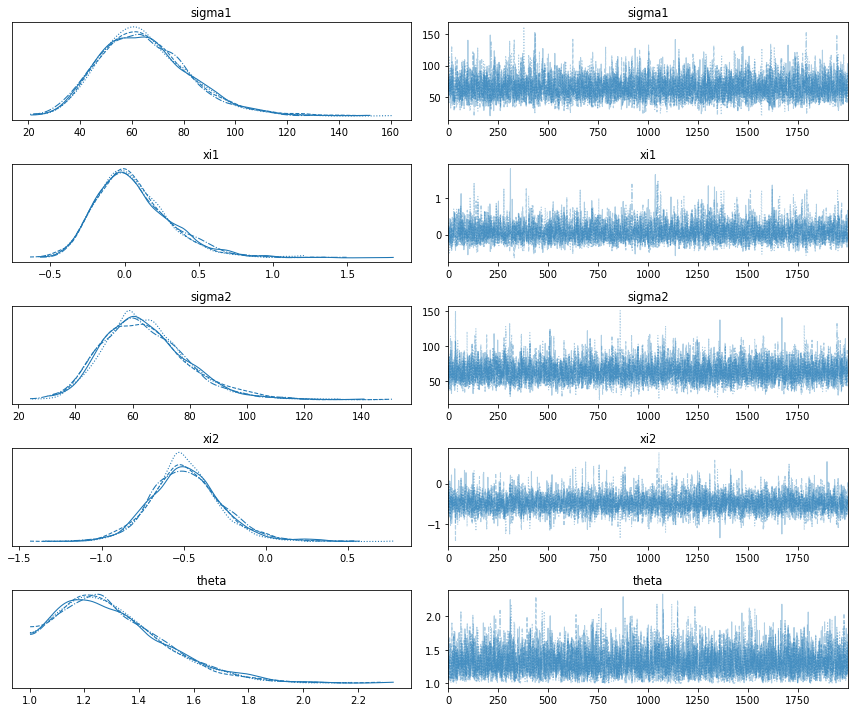

In [37]:
# inspect the trace plot for pathologies
# (1) high autocorrelation (will also manifest as ess_bulk and ess_tall values in the hundreds )
# (2) divergences - marked as vertical black lines along the x axis in the trace plot, often
#     associated with the chain getting stuck somewhere
#
# Here we just show the model parameters (sigma1, sigma2, xi1, xi2, theta) and not values derived from them
jrp.generate_trace_plot("DATA/trace_plot.png",)

Generating JRP plot ...


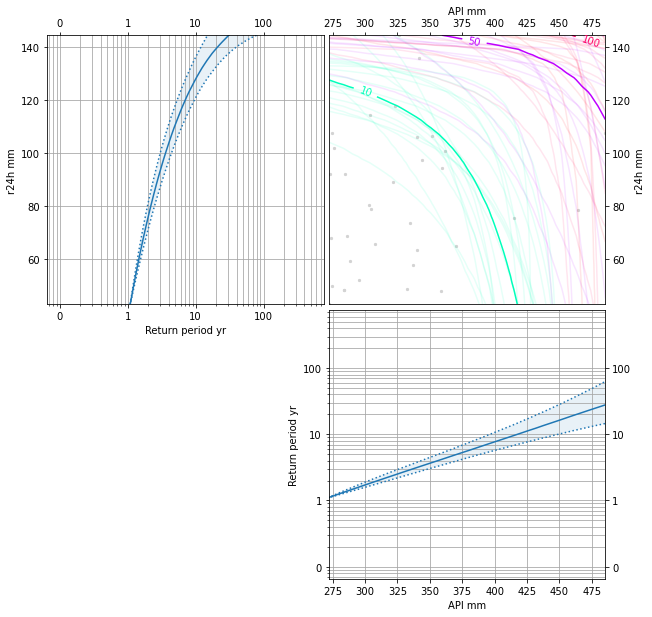

In [38]:
# JRP plot without lines
fig = jrp.generate_jrp_plot(filename="DATA/jrp_without_lines_plot.png")

Generating JRP plot ...


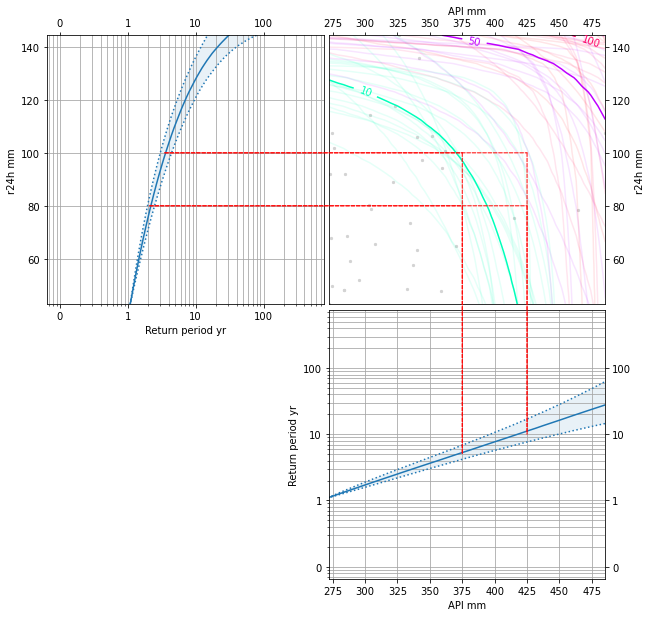

In [39]:
# JRP plot with lines

driver1_coords=[
    [2.1,80],
    [2.1,80],
    [3.5,100],
    [3.5,100]
]

driver2_coords=[
    [375,5],
    [425,10.1],
    [375,5],
    [425,10.1]
]


jrp_coords=[
    [375,80],
    [425,80],
    [375,100],
    [425,100],
]

fig = jrp.generate_jrp_plot(
                            driver1_coords=driver1_coords,
                            driver2_coords=driver2_coords,
                            jrp_coords=jrp_coords,
                            filename="DATA/jrp_with_lines_plot.png"
                        )

In [48]:
# driver 1 marginal return period for the red lines -  these are fixed values we set when
# when we initialised the JRP object
jrp.stan_data['u_rp_d1']/365

array([ 2., 10.])

In [45]:
# driver 1 values for red lines above - 50th percentile
np.percentile(jrp.result['u_d1_for_rp'],50,axis=1)

array([310.04874878, 417.6834235 ])

In [49]:
# driver 2 marginal return period for red lines above - fixed value again
jrp.stan_data['u_rp_d2']/365

array([ 2., 10.])

In [46]:
# driver 2 values for red lines above  - 50th percentile
np.percentile(jrp.result['u_d1_for_rp'],50,axis=1)

array([310.04874878, 417.6834235 ])

In [61]:
# JRPs for both points - 50th percentile
np.percentile(jrp.result['u_JRP']/365,50,axis=1)

array([ 3.15551744, 29.06650719])

In [ ]:
## BUT! I think we should also include the following figures, at least in the final report
# when we are describing the Bayesian model, to avoid any confusion

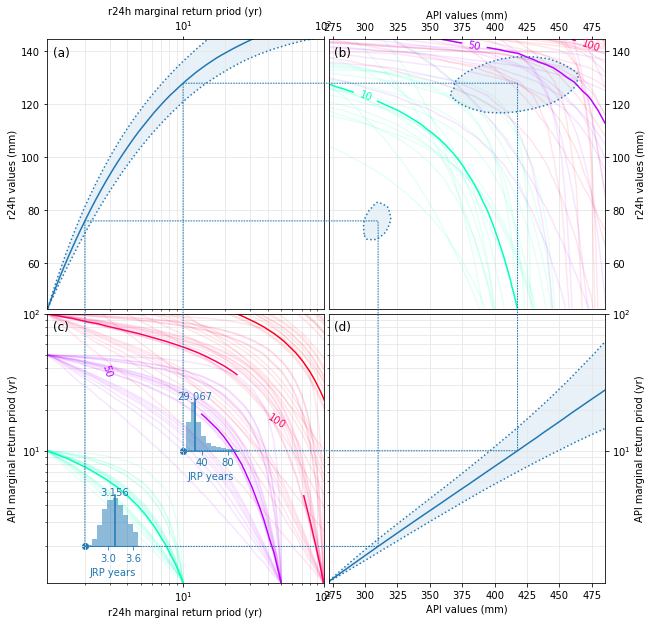

In [41]:
# It's important to note that fixing the marginal return probability for the two drivers
# defines a distribution over the driver values, and vice versa, i.e. fixing a value
# for both of the drivers specifies a distribution over marginal return periods.
#
# In other words, there isn't a 1:1 relationship between driver value and driver marginal return period
#
# In order to make this clear in our final report I created a modified JRP plot with the fourth panel added
# to give a 2nd JRP contour plot, but this time specified in terms of marginal return probability instead of
# the driver values. This now forms panel (c), shown below.
#
# Here we fix driver marginal return periods (mrp) for two events, one at (20,20) years, one at (200,200) years. 
# These plot as single points in panel (c). But each of these points specifies a distribution over 
# Joint Return Probability (JRP), shown by the histograms plotted inset in (c), and a distribution  over 
# driver values, represented by  the ellipses (that enclose 50% of the probability mass of these distributions) 
# in panel (b). Here, the dotted lines linking panels connect the medians of the distributions.
#
# This is a necessary consequence of our Bayesian model. Our model infers a posterior distribution over its
# parameters (i.e. sigma1, sigma2, xi1, xi2, theta), which means for any driver value or mrp held constant, there is 
# a distribution over the model parameters, and therefore a distribution over anything inferred from them. 
#
# In this case we have fixed values of marginal return probability and we want to estimate the JRP and the 
# driver values from them. However our model specifies distributions over the parameters sigm1, etc., so we
# therefore have distributions over driver values and JRP also.

jrp.generate_jrp_plot2(
    PLOT_USER_D1D2=True,
    PLOT_ALL_DATA=False
)

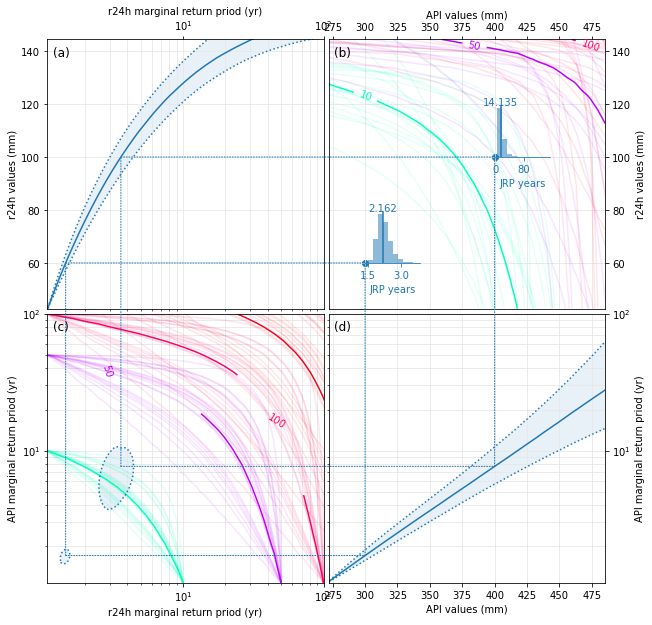

In [19]:
# we can see the same situation in reverse by fixing the driver values, instead of the mrps. 
# Here the values of the driver are fixed, and the events plot as single points in panel (b),
# defining a distribution over JRP values which are shown as inset graphs as before. You can think
# of the inset  graphs as showing the distribution of all the JRP contours that insersect that point.
# The median value of the JRP is highlighted on each inset plot. However, to calculate the marginal return period
# for these fixed driver values we need to use the model parameters (sigma1, theta, etc.), and we have
# distributions over these parameters, so again we have distributions over the marginal return periods,
# as shown in panel (c). Note that although the blue dotted lines join the medians of the distributions
# as before, the (mrp,mrp) plot is on log-log axes, and so the medians appear more offset with respect to the 
# center of the ellipse than they are.
# 
jrp.generate_jrp_plot2(
    PLOT_USER_D1D2=False,
    PLOT_ALL_DATA=False,
    PLOT_USER_MRPS=True
)

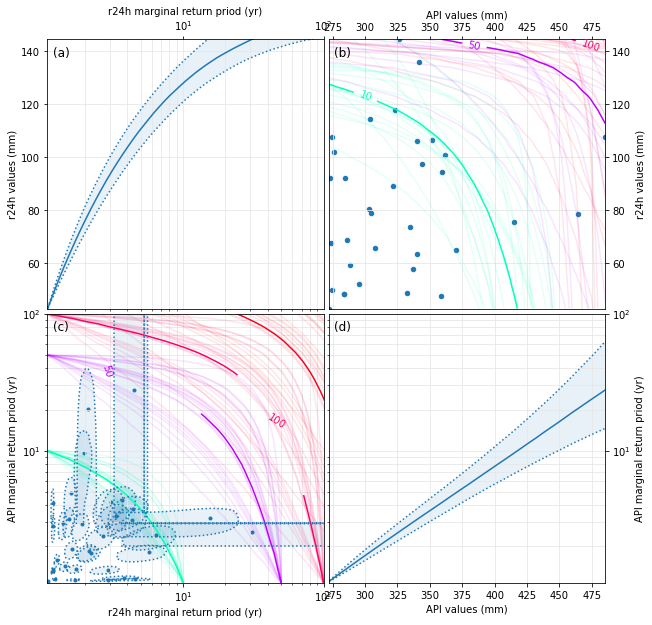

In [20]:
# We can do a similar plot, but this time with the distributions over marginal return period
# for all of our data, as inferred by our model (we omit the lines joining them and the JRP
# inset plots to avoid cluttering up the figure)

jrp.generate_jrp_plot2(PLOT_ALL_DATA=True)

/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/matplotlib/mlab.py:977: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset - points[:, i, np.newaxis]


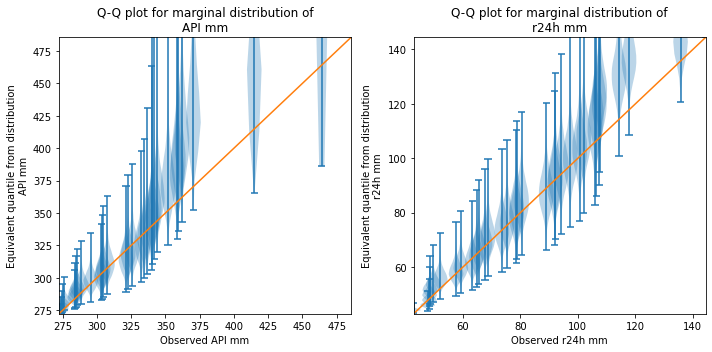

In [21]:
# Bayesian quantile-quantile plot
jrp.generate_QQ_plot("DATA/qq_plot.png")

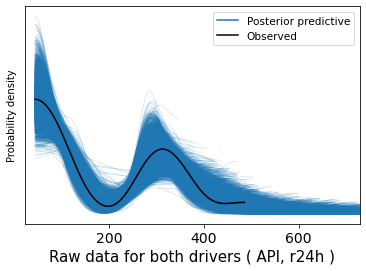

In [22]:
# Posterior predictive checks plot
jrp.generate_ppc_plot("DATA/ppc_plot.png")

Generating corner plot ...


/home/talfan/anaconda3/envs/retrieval/lib/python3.8/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


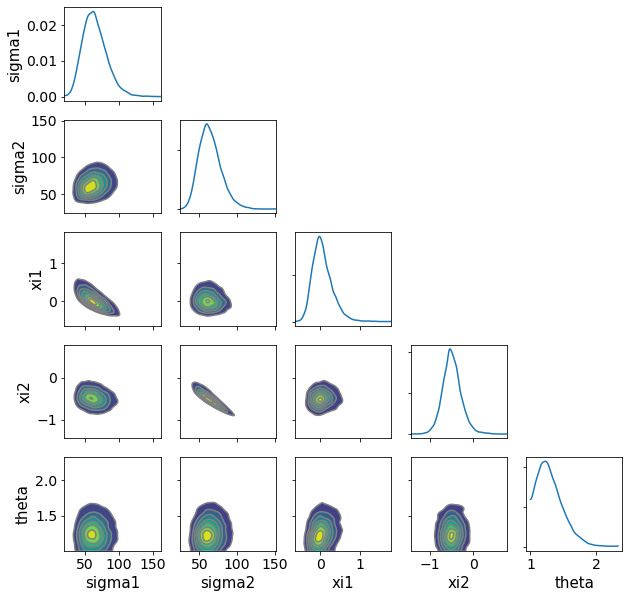

In [23]:
# Corner plot
fig = jrp.generate_corner_plot("DATA/corner_plot.png")